# Metodo de Minimos Cuadrados (lineal) con Python
**********
Dr. Fernando J. Gomez (CICTERRA-CONICET-UNC)


## Ajustando una recta a un conjunto de datos

En numerosos casos en Ciencias Geologicas, luego de realizar mediciones o hacer determinaciones en el laboratorio, tenemos un grupo de datos que relaciona dos variables, por ejemplo $(x_1, y_1), \dots ,(x_n, y_n)$ y queremos encontrar una funcion $f(x)$ que se ajuste a ese grupo de datos para asi poder extrapolar los mismos a valores no determinados experimentalmente o en el campo. Esa funcion puede ser una recta, una funcion exponencial, un polinomio, etc y su eleccion en muchos casos dependera del conocimiento que uno tenga del problema fisico en cuestion.

Supongamos que a un conjunto de datos ($y_n$, $x_n$) como por ejemplo el de la Tabla  queremos ajustar una recta que tiene por ecuacion $y=a_0+a_1x$. En esta ecuacion $a_0$ representa la *ordenada al origen* y $a_1$ representa la *pendiente* de esa recta. Si bien hay diferentes formas de intentar ajustar los datos (ver por ejemplo Gilat y Subramaniana, 2014) la forma mas utilizada es la de los minimos cuadrados dado por la siguiente ecuacion general:

$$E=\sum_{i=1}^{n} {[y_n-(a_{1}x_n+a_{0})]}^2$$

Esta ecuacion expresa que el error de ajuste ($E$) es la suma de los cuadrados de las diferencias entre los valores de $y$ provistos por la recta de ajuste (dados por $ax_n+b$)  y los valores de $y$ medidos (dados por $y_n$). Como los valores de $y_n$ y $x_n$ son conocidos (pues son nuestros datos) todo se reduce a encontrar los valores de $a_{0}$ y $a_{1}$ que reducen el error al minimo. Para lograr esto tomamos la derivada parcial de la ecuacion anterior en funcion de las dos variables $a_{0}$ y $a_{1}$ y obtenemos el siguiente sistema de ecuaciones:

$$\dfrac{\partial E}{\partial a_{0}} = -2 \sum_{i=1}^{n} (y_n-a_{1}x_n+a_{0})$$
$$\dfrac{\partial E}{\partial a_{1}} = -2 \sum_{i=1}^{n} (y_n-a_{1}x_n+a_{0})x_n$$


Luego dividimos ambas ecuaciones por $2$ e igualamos a cero (la razon por la que igualamos a cero es porque es cuando se minimiza el error, pues cuando la derivada de una funci\'{o}n es igual a cero tenemos un minimo). O sea $\dfrac{\partial E}{\partial a_{0}}=0$ y $\dfrac{\partial E}{\partial a_{1}}=0$) obteniendo lo que en mi}nimos cuadrados se conocen como las **ecuaciones normales**:


$$\sum_{i=1}^{n} (y_n-a_{1}x_n+a_{0})x_n =0 $$
$$\sum_{i=1}^{n} (y_n-a_{1}x_n+a_{0}) =0$$


Esto puede reescribirse de la siguiente manera:


$$\left(\sum_{i=1}^{n} x_n \right) a_{0} + \left(\sum_{i=1}^{n} x_n^{2}\right) a_{1}  = \left(\sum_{i=1}^{n} y_n x_n\right)$$

$$\left(\sum_{i=1}^{n} 1\right) a_{0} + \left(\sum_{i=1}^{n} x_n\right) a_{1}   = \left(\sum_{i=1}^{n} y_n\right)$$



Luego de algunas manipulaciones algebraicas podemos obtener la solucion para $a_{0}$ y $a_{1}$ del sistema de ecuaciones que se detalla a continucacion (ver mas detalles de una derivacion similar en Numerical Analysis de Burden and Faires, pag. 518 y en Linear Algebra de Gilbert Strang, pag. 197):

 $$a_{0} = \dfrac{\sum\limits_{i=1}^{n} x_n^{2} \sum\limits_{i=1}^{n} y_n - \sum\limits_{i=1}^{n} x_n y_n \sum\limits_{i=1}^{n} x_n}{n\left(\sum\limits_{i=1}^{n} x_n^{2}\right) - \left(\sum\limits_{i=1}^{n} x_n\right)^{2}}$$
 
$$ a_{1} = \dfrac{\sum\limits_{i=1}^{n} x_n y_n - \sum\limits_{i=1}^{n} x_n  \sum\limits_{i=1}^{n} y_n}{n\left(\sum\limits_{i=1}^{n} x_n^{2}\right) - \left(\sum\limits_{i=1}^{n} x_n\right)^{2}} $$

Veamos esto mediante un ejemplo. Por ejemplo supongamos que tenemos un conjunto de datos ($x_n$ e $y_n$) de isotopos de carbono y oxigeno en carbonatos sedimentarios y que estan expresados de la siguiente forma:

|$x_n$     | $\delta^{13}C$ |$y_n$       |$\delta^{18}O$ |
|----------|----------------|------------|---------------|
|$x_1$     | 8.87           | $y_1$      | 0.31          | 
|$x_2$     | 8.29           | $y_2$      | -0.13         | 
|$x_3$     | 8.49           | $y_3$      | -0.06         |  
|$x_4$     | 8.75           | $y_4$      | -0.31         |  
|$x_5$     | 8.86           | $y_5$      | 0.35          | 
|$x_6$     | 9.23           | $y_6$      | 0.20          |
|$x_7$     | 10.75          | $y_7$      | 1.80          |
|$x_8$     | 10.00          | $y_8$      | 0.57          |
|$x_9$     | 10.15          | $y_9$      | 1.11          |  
|$x_{10}$  | 10.01          | $y_{10}$   | 1.61          |  


Para aplicar las ecuaciones para determinar $a_0$ y $a_1$  al ejemplo de la tabla de valores de $\delta^{13}C$ y $\delta^{18}O$ obtenemos primero las siguientes sumatorias:

|$\sum\limits_{i=1}^{n} x_n$ | $\sum\limits_{i=1}^{n} x_{n}^{2}$ |  $\sum\limits_{i=1}^{n} x_n y_n$    | $\sum\limits_{i=1}^{n} y_n$ | 
|------------------------------|----------|---------------|-------------|
|93.400                        | 878.521  | 55.829        |     5.450   |
 
Luego reemplazamos en las ecuaciones para calcular $a_0$ y $a_1$:

 $$a_{0} = \dfrac{\sum\limits_{i=1}^{n} x_n^{2} \sum\limits_{i=1}^{n} y_n - \sum\limits_{i=1}^{n} x_n y_n \sum\limits_{i=1}^{n} x_n}{n\left(\sum\limits_{i=1}^{n} x_n^{2}\right) - \left(\sum\limits_{i=1}^{n} x_n\right)^{2}} = \dfrac{878.521 \cdot 5.450 -55.829 \cdot 93.400}{10 \cdot 878.521 - 8723.560} = -6.919$$
 
 $$a_{1} = \dfrac{n\sum\limits_{i=1}^{n} x_n y_n - \sum\limits_{i=1}^{n} x_n  \sum\limits_{i=1}^{n} y_n}{n\left(\sum\limits_{i=1}^{n} x_n^{2}\right) - \left(\sum\limits_{i=1}^{n} x_n\right)^{2}} = \dfrac{10 \cdot 55.829 - 93.400 \cdot 5.450}{10 \cdot 878.521 - 8723.56} = 0.799$$


In [2]:
%matplotlib inline

El siguiente script de Python realiza esos calculos usando Python como si fuera una simple calculadora y luego graficamos.

In [18]:
#llamo las librerias a utilizar (numpy y matplotlib)-----------------
import numpy as np
import matplotlib.pyplot as plt

#creo dos arrays con los valores de x e y--------------------------
#Los datos son de Gomez et al., 2014.
xn=np.array([8.87, 8.29, 8.49, 8.75, 8.86,
    9.23, 10.75, 10.00, 10.15, 10.01])

yn=np.array([0.31, -0.13, -0.06, -0.31,
    0.35, 0.20, 1.80, 0.57, 1.11, 1.61])

#obtengo el valor de n (numero de datos)
n=len(xn)

#Hago las sumatorias y demas operaciones-----------------------------
Sum_x=sum(xn)
Sum_y=sum(yn)
Sum_xx=sum(xn**2)
Sum_xy=sum(xn*yn)

#imprimo los valores para verlos-------------------------------------
print(Sum_x, Sum_y, Sum_xx, Sum_xy)

93.4 5.45 878.5212 55.8297


-6.9187283462 0.799114383962


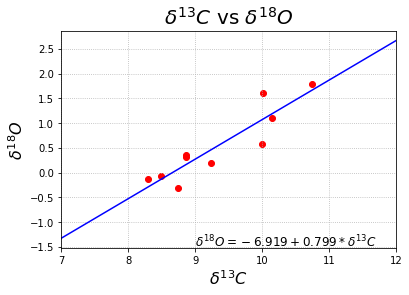

In [7]:
#ahora reemplazo en a_0 y a_1 y los imprimo  para visualizarlos------
a_0=(Sum_xx*Sum_y-Sum_xy*Sum_x)/(n*Sum_xx-Sum_x**2)
a_1=(n*Sum_xy-Sum_x*Sum_y)/(n*Sum_xx-Sum_x**2)
print(a_0, a_1)

#Genero valores para plotear la recta segun a_0 y a_1----------------
x=np.linspace(7, 12, 2)
y=a_0+a_1*x

#Grafico de los puntos y la recta de ajuste--------------------------
plt.figure(1)
plt.scatter(xn, yn, color='r')
plt.grid(linestyle='dotted')
plt.plot(x, y, color='b')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(7, 12)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
#plt.savefig('least_square_manual.pdf') #Guardo la figura como pdf
plt.show()
#--------------------------------------------------------------------


[[-6.91872835]
 [ 0.79911438]]


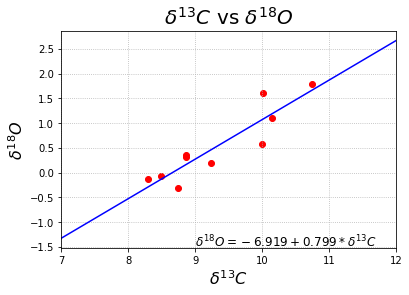

In [9]:
#este script esta basado en uno similar en el sitio Wikipedia
#https://en.wikipedia.org/wiki/Linear_least_squares_(mathematics)----
#Primero llamamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt

#Generamos los datos como un array de numpy--------------------------
datos = np.array([
    [8.87, 0.31],
    [8.29,-0.13],
    [8.49,-0.06],
    [8.75,-0.31],
    [8.86, 0.35],
    [9.23, 0.20],
    [10.75,1.80],
    [10.00,0.57],
    [10.15,1.11],
    [10.01,1.61]
    ])

#Determinamos el valor de m con len(m)-------------------------------
m = len(datos)


#Creamos la matriz A-------------------------------------------------
#np.ones(m) crea un array de numeros "1" con "m" elementos
#Con eso, mas los valores de xn (datos) creamos la matriz A
#Ademas usamos "np.array().T" que transpone la matriz A
A = np.array([np.ones(m), datos[:, 0]]).T
#de datos tomamos los valores de yn, con "reshape" lo transformamos
#en vector columna
yn = np.array(datos[:, 1]).reshape(-1, 1)
#Usamos la funcion np.linalg.solve que hace las operaciones de
#matrix necesarias para resolver el sistema de ecuaciones que
#nos da el vector de coeficientes (xc) con valores de a_0 y a_1
xc = np.linalg.solve(A.T.dot(A), A.T.dot(yn))

#Imprimimos el valor de a_0 y a_1
print(xc)

#Graficamos----------------------------------------------------------
plt.figure(1)
x = np.linspace(7, 12, 2)
y = np.array(xc[0] + xc[1] * x)
plt.plot(x, y.T, color='b')
plt.grid(linestyle='dotted')
plt.scatter(datos[:, 0], datos[:, 1], color='r')
plt.title('d13C vs d18O')
plt.xlabel('d13C')
plt.ylabel('d18O')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(7, 12)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
#plt.savefig('least_square_matrix.pdf')
plt.show()
#--------------------------------------------------------------------

[ 0.79911438 -6.91872835]
 
0.7991 x - 6.919


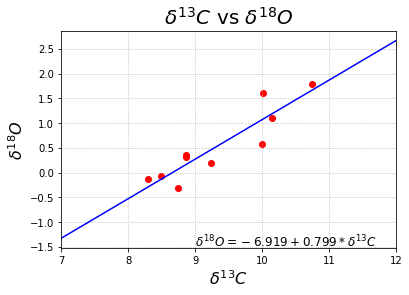

In [11]:
#Llamamos las librerias necesarias---------------------------------------------
import numpy as np
import matplotlib.pyplot as plt

#Creamos array de numpy con los datos------------------------------------------
xn=np.array([8.87, 8.29, 8.49, 8.75, 8.86, 9.23, 10.75, 10.00, 10.15, 10.01])
yn=np.array([0.31, -0.13, -0.06, -0.31, 0.35, 0.20, 1.80, 0.57, 1.11, 1.61])

#Usamos la funcion polyfit de numpy, con argumento 1 que es una recta----------
xc = np.polyfit(xn, yn, 1) #da los valores de a_1 y a_0
mc = np.poly1d(xc) #genera la ecuacion de la recta
print(xc) #imprime los valres de a_1 y a_0
print(mc) #imprime la ecuacion de la recta--------------------------------------

#Hacemos la grafica------------------------------------------------------------
x = np.linspace(7, 12, 100)
plt.figure(1)
plt.scatter(xn, yn, color='r')
plt.grid(linestyle='dotted')
plt.plot(x, mc(x), color='b')
plt.title(r'$\delta ^{13}C$ vs $\delta ^{18}O$', fontsize=20)
plt.xlabel(r'$\delta ^{13}C$', fontsize=16)
plt.ylabel(r'$\delta ^{18}O$', fontsize=16)
plt.xlim(7, 12)
plt.text(9, -1.5, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$', fontsize=12)
#plt.savefig('least_square_polyfit.pdf')
#Muestra la figura generada----------------------------------------------------
plt.show()

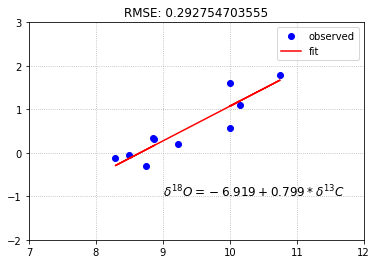

slope, intercept: 0.799114383962 -6.9187283462
[ 0.16941624 -0.2940701  -0.13424723  0.07352251  0.1614251   0.45709742
  1.67175128  1.07241549  1.19228265  1.08040664]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

x=np.array([8.87, 8.29, 8.49, 8.75, 8.86,
    9.23, 10.75, 10.00, 10.15, 10.01])

y=np.array([0.31, -0.13, -0.06, -0.31,
    0.35, 0.20, 1.80, 0.57, 1.11, 1.61])

#x, y = np.loadtxt('xydatafit.dat')
slope, intercept, r_value, p_value, std_err = linregress(x, y)
yfit = slope * x + intercept
plt.figure()
plt.plot(x, y, 'bo', label='observed')
plt.plot(x, yfit, 'r', label='fit')
rmse = np.sqrt(np.sum((yfit - y) ** 2) / len(y))
plt.title('RMSE: '+str(rmse))
plt.xlim(7, 12)
plt.ylim(-2, 3)
plt.legend(loc='best')
plt.grid(linestyle='dotted')
plt.text(9, -1.0, r'$\delta ^{18}O=-6.919+0.799*\delta ^{13}C$',
    fontsize=12)
plt.show()
print('slope, intercept:', slope, intercept)
print(yfit)

**ESTO ES AUN TRABAJO EN PROGRESO**